# Milestone 1 - Phase 2
Fathiyah Kalamal Haq - Batch 009

# **Customer Churn Prediction with ANN**

In this notebook I make prediction model about Churn Customer in Telco Company. Churn is the customer who left within the last month. To predict this case, the model that I use is Artificial Neural Network. The best architeture of the model will be used to predict a customer will stay or not.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from tensorflow.data import Dataset
#model architecture
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Dense,Input
#model evaluation
from sklearn.metrics import classification_report
#model saving
import pickle

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',sep=",")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data = df.copy()

copy the dataset and name it `data` so if there's a change in df we can always see the real dataset in `data`

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset has 7043 rows and 20 columns that the data types are float,integer and object. Missing value doesn't shows in this dataset.

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

some columns have binary classification. Total Charges has 6531 unique values eventhough it's an object data type and if we see in the preview above, the column is a numerical data not a categorical data. 

# EDA

## Churn Customer 

<AxesSubplot:title={'center':'Customer Churn'}>

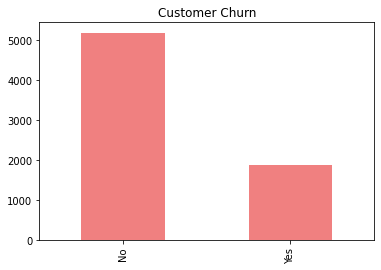

In [10]:
df.Churn.value_counts().plot(kind='bar',title='Customer Churn',color = 'lightcoral')

Customers that had left within last month is lower than the customers who stay. The Churn Customers are a minority class in this dataset with about 20% from the dataset.

## Total Charges

In [11]:
df.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

There are missing values in Total Charges column that symbolize by an empty space, so in the `df.info()` we couldnt discover it before. But by count the values, the missing values can be shown. 11 rows of Total Charges have missing values. Since it's just about 0.1% from the dataset, we can trim this data.

In [12]:
df[df.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Here are all the rows that the Total Charges are missing values

## Check every unique values

In [13]:
cat = df.select_dtypes(include='object').columns.tolist()
for i in cat[1:16]:
    print(i,': ', df[i].unique())

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


Above are the unique values of every categorical column except customer ID and churn. From this, I discovered that every multiple Lines that the value is 'no phone service' are when the value is 'No' in Phone Service column, so are Online Security, online backup, until streaming movies for 'No' value on Internet Service. Hence, as long as the value for multiple lines are 'No phone service', but still, it means that customer doesnt have multiple lines so the information can be represent by 'No' value. Analogous to 'No Internet service' and some columns which have this value.

## Descriptive Statistics

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Senior Citizen is a numeric-categorical column. 

## Distribution Monthly Charges

Text(0.5, 1.0, 'Monthly Charges Histogram')

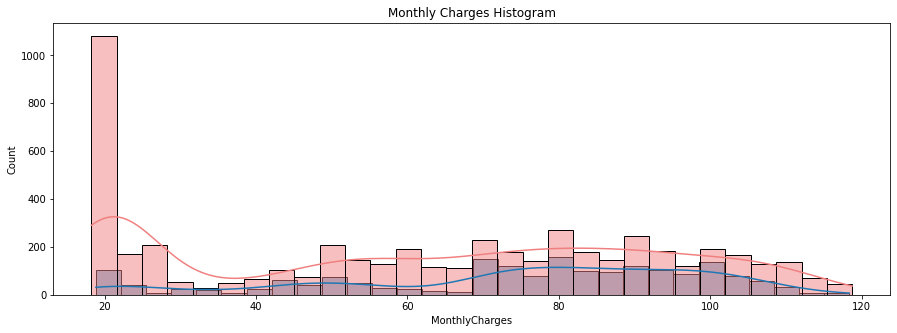

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(df[df['Churn']=='Yes']['MonthlyCharges'],bins=30,kde=True)
sns.histplot(df[df['Churn']=='No']['MonthlyCharges'],bins=30,kde=True,color='lightcoral')
plt.title('Monthly Charges Histogram')

Churn customer has low monthly Charges than the customer who stay subscribed.

In [20]:
df[df['Churn']=='Yes'].iloc[0]

customerID              3668-QPYBK
gender                        Male
SeniorCitizen                    0
Partner                         No
Dependents                      No
tenure                           2
PhoneService                   Yes
MultipleLines                   No
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                   Yes
DeviceProtection                No
TechSupport                     No
StreamingTV                     No
StreamingMovies                 No
Contract            Month-to-month
PaperlessBilling               Yes
PaymentMethod         Mailed check
MonthlyCharges               53.85
TotalCharges                108.15
Churn                          Yes
Name: 2, dtype: object

# Data Preprocessing

## Cardinality

in this section, I will detect high cardinality column from the dataset like customer ID column. I also going to replace some categorical columns into numeric-categorical column to ease my work in the Feature Scaling.

In [ ]:
df.customerID.nunique()

7043

In [ ]:
df.gender = np.where(df.gender == "Female",1,0)
df.Partner = np.where(df.Partner == "Yes",1,0)
df.Dependents = np.where(df.Dependents == "Yes",1,0)
df.PhoneService = np.where(df.PhoneService == "Yes",1,0)
df.MultipleLines = np.where(df.MultipleLines=="Yes",1,0)
df.OnlineSecurity = np.where(df.OnlineSecurity == "Yes",1,0)
df.OnlineBackup = np.where(df.OnlineBackup == "Yes",1,0)
df.DeviceProtection = np.where(df.DeviceProtection == "Yes",1,0)
df.TechSupport = np.where(df.TechSupport == "Yes",1,0)
df.StreamingTV = np.where(df.StreamingTV == "Yes",1,0)
df.StreamingMovies = np.where(df.StreamingMovies == "Yes",1,0)
df.PaperlessBilling = np.where(df.PaperlessBilling == "Yes",1,0)
df.Churn = np.where(df.Churn == 'Yes',1,0)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


Above is the dataset after I modified the columns.

## Splitting Data

In [ ]:
#split features and target
X = df.drop('Churn', axis=1)
y = df.Churn
#split train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42)
#split train validation
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(4225, 20)
(1057, 20)
(1761, 20)
(4225,)
(1057,)
(1761,)


I need to split data into test-train-validation. Train and validation are for training the model and test is to test the prediction of the best model. 

# Outliers

<AxesSubplot:>

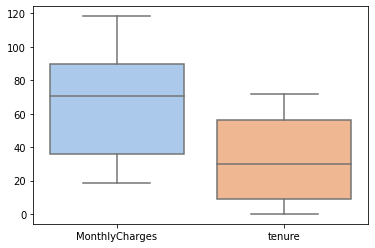

In [ ]:
sns.boxplot(data=X_train[['MonthlyCharges','tenure']], palette="pastel")

There's no outliers detected in the numerical columns

# Missing Values

In EDA, Total Charges is known to have some missing values. Because they're missing value completely at random so I'll trim the rows that contain missing values.

In [ ]:
X_val[X_val.TotalCharges==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4380,2520-SGTTA,1,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,
1082,4367-NUYAO,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,
3826,3213-VVOLG,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,
753,3115-CZMZD,0,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,
488,4472-LVYGI,1,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,


In [ ]:
na1 = X_train[X_train.TotalCharges==' '].index
na2 = X_test[X_test.TotalCharges==' '].index
na3 = X_val[X_val.TotalCharges==' '].index
X_train = X_train.drop(na1, axis=0)
X_test = X_test.drop(na2, axis=0)
X_val = X_val.drop(na3, axis=0)
y_train = y_train.drop(na1, axis=0)
y_test = y_test.drop(na2,axis=0)
y_val = y_val.drop(na3, axis=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(4222, 20)
(1758, 20)
(1052, 20)
(4222,)
(1758,)
(1052,)


In [ ]:
df.isnull().sum().sum()

0

Total Charges is a numerical column, so I must change the type of the data.

In [ ]:
X_train.TotalCharges = X_train.TotalCharges.astype(float)
X_test.TotalCharges = X_test.TotalCharges.astype(float)
X_val.TotalCharges = X_val.TotalCharges.astype(float)
X_train.TotalCharges.info()

<class 'pandas.core.series.Series'>
Int64Index: 4222 entries, 1324 to 5019
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
4222 non-null   float64
dtypes: float64(1)
memory usage: 66.0 KB


Now, total charges is in a float type data. Since it has turned to numerical column, I have to check if total charges has outliers or not and also how the distribution, how this column correlate with other numerical columns.

<AxesSubplot:>

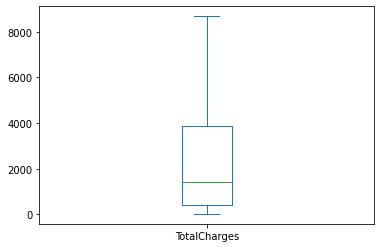

In [ ]:
X_train.TotalCharges.plot(kind='box')

There's no outliers found in this column and the distribution of Total Charges feature is skewed positive.

## Feature Selection

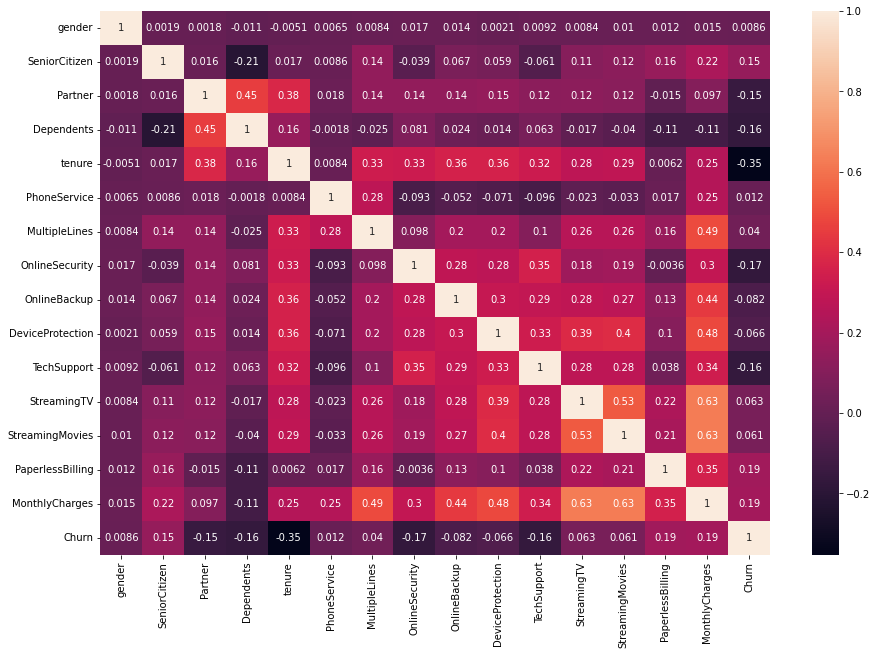

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
X_train = X_train.drop('customerID',axis=1)
X_test = X_test.drop("customerID",axis=1)
X_val = X_val.drop("customerID", axis=1)

Since customer ID has a high cardinality, dropping the columns is the best way to make a right prediction model.

# Feature Scaling and Encoding

It's important to have a dataset that has same scaling before put it in the model. So here, I normalize the dataset into one scale number (0-1). Standar Scaler will change every numerical column into 0-1, and One hot encoding will change every categorical column into binary matrix.

In [ ]:
num_col = X_train.select_dtypes(include=np.number).columns.tolist()
cat_col = X_train.select_dtypes(include='O').columns.tolist()
print('num: ',num_col)
print("cat: ",cat_col)

num:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges']
cat:  ['InternetService', 'Contract', 'PaymentMethod']


Pipeline preprocessing consist of two normalization I mention before.

In [ ]:
std = StandardScaler()
ohe = OneHotEncoder()
pipe_prep = ColumnTransformer([
    ('scale', std, num_col),
    ('encode', ohe, cat_col)
])

In [ ]:
# Feature extraction with pipeline

X_train_scale = pipe_prep.fit_transform(X_train)
X_test_scale = pipe_prep.transform(X_test)
X_val_scale = pipe_prep.transform(X_val)

Now, the dataset are in the same scale.

## Pipeline Tensorflow

Pipeline tensorflow is made for memory efficiency.

In [ ]:
train_dataset = Dataset.from_tensor_slices((X_train_scale, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
val_dataset = Dataset.from_tensor_slices((X_val_scale, y_val))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(64)
test_dataset = Dataset.from_tensor_slices((X_test_scale, y_test))
test_dataset = test_dataset.batch(64)

# Model Definition

To make a prediction of churn customer I use Artificial Neural Network (ANN) model. The ANN model has two kind of type of model architecture; Sequential Model and Functional API.

## Sequential Model

Hyperparameter that I use in sequential model is reLU (rectified linear unit) activation fot the hidden layer and sigmoid for output layer because there's only two categories in target (churn or not churn). I made 4 neuron in hidden layer and only use 1 hidden layer.
The optimizer I use is adam optimizer where this optimizer is adaptive learning rate and fast enough to reach convergence point. The metric to evaluate this model is accuracy. Since the target is binary classification, I choose binary cross entropy for the loss.
The epochs is 100 epochs.

In [ ]:
#model1 architecture
model1 = Sequential()
model1.add(Dense(4, activation = 'relu',input_shape=(26,)))
model1.add(Dense(1,activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model1.fit(train_dataset, epochs = 100, validation_data=(val_dataset))

Epoch 1/100
66/66 [==============================] - 1s 2ms/step - loss: 0.7119 - accuracy: 0.5618 - val_loss: 0.6011 - val_accuracy: 0.6454
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.6964 - val_loss: 0.5253 - val_accuracy: 0.7167
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5217 - accuracy: 0.7385 - val_loss: 0.4949 - val_accuracy: 0.7376
Epoch 4/100
66/66 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7515 - val_loss: 0.4787 - val_accuracy: 0.7443
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4791 - accuracy: 0.7613 - val_loss: 0.4688 - val_accuracy: 0.7452
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7700 - val_loss: 0.4616 - val_accuracy: 0.7624
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.7800 - val_loss: 0.4566 - val_accuracy: 0.7757
Epoch 8/100
6

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.711909,0.561819,0.601107,0.645437
1,0.575135,0.696352,0.525283,0.716730
2,0.521723,0.738513,0.494861,0.737643
3,0.495319,0.751540,0.478723,0.744297
4,0.479090,0.761251,0.468810,0.745247


I put the evaluation result in metrics data frame to ease my work for the visualization of metrics evaluation

<AxesSubplot:>

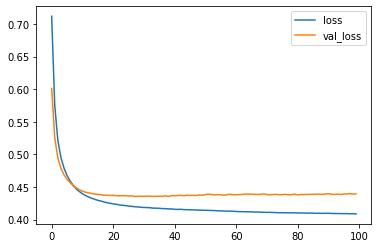

In [ ]:
metrics[['loss','val_loss']].plot()

the train loss are decreasing convergently to 0.4 but the validation loss are stay away from the train loss. This is indicate an overfitting condition.

<AxesSubplot:>

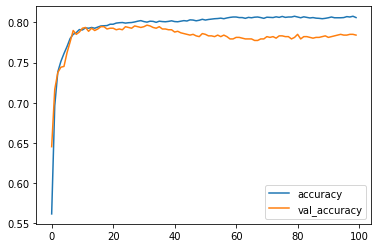

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

Same with the loss, the accuracy of train set are increasing convergently to about 0.80 but the validation accuracy are stay away from the train accuracy. The model are overfit.

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 108       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


## Model Evaluation for Sequential Model

In [ ]:
print("\nEvaluate on test data")
result = model1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])


Evaluate on test data
28/28 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8038
Test - Loss     :  0.41943860054016113
Test - Accuracy :  0.8037542700767517


In [ ]:
y_pred1 = model1.predict(test_dataset)
y_pred1 = np.where(y_pred1 > 0.5,1,0)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1279
           1       0.68      0.54      0.60       479

    accuracy                           0.80      1758
   macro avg       0.76      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758



from classification report, the imbalanced between two classes are showing big difference. For the customer who stay, the model can predict it better than predicting the churn customer. It indicate the model is lack of studying the churn customer cases if we look at the f1 score for the two classes. But the weightes average is having a good score so although not having a great performa for predicting the churn customer, the model still can predict all classes really well.

## Functional API Model

For functional API model, the hyperparameter that I use are the same with sequential model.

In [ ]:
inp = Input(shape=(26,))
hid1 = Dense(4,activation='relu')(inp) 
out = Dense(1, activation='sigmoid')(hid1)

model2 = Model(inputs=inp, outputs=out)
model2.compile(loss  = 'binary_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])

history2 = model2.fit(train_dataset, epochs=100, validation_data = (val_dataset))

Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 0.8366 - accuracy: 0.4403 - val_loss: 0.7564 - val_accuracy: 0.4838
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.6037 - val_loss: 0.6391 - val_accuracy: 0.6730
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5947 - accuracy: 0.7120 - val_loss: 0.5618 - val_accuracy: 0.7319
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7537 - val_loss: 0.5169 - val_accuracy: 0.7510
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7676 - val_loss: 0.4897 - val_accuracy: 0.7548
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7766 - val_loss: 0.4739 - val_accuracy: 0.7624
Epoch 7/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7793 - val_loss: 0.4630 - val_accuracy: 0.7633
Epoch 8/100
6

## Model Evaluation for Functional API

In [ ]:
print("\nTest Evaluation")
result2 = model2.evaluate(test_dataset)
print('Test - Loss     : ', result2[0])
print('Test - Accuracy : ', result2[1])


Test Evaluation
28/28 [==============================] - 0s 927us/step - loss: 0.4103 - accuracy: 0.8072
Test - Loss     :  0.41026195883750916
Test - Accuracy :  0.8071672320365906


In [ ]:
metrics_fun = pd.DataFrame(history2.history)
metrics_fun.head()

,loss,accuracy,val_loss,val_accuracy
0,0.836617,0.440313,0.756407,0.483840
1,0.691997,0.603742,0.639127,0.673004
2,0.594736,0.711985,0.561808,0.731939
3,0.534274,0.753671,0.516884,0.750951
4,0.498329,0.767646,0.489713,0.754753


<AxesSubplot:>

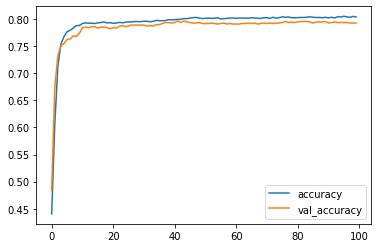

In [ ]:
metrics_fun[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

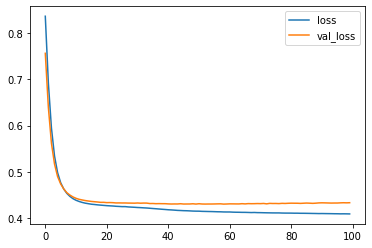

In [ ]:
metrics_fun[['loss','val_loss']].plot()

The evaluation of model indicates that the model is overfitting but getting better result than sequential model. It seems that the loss are under 0.45 just like the sequential model. The graphic shows stagnan validation in 0.45 (also the same with sequential model). But the accuracy is convergent to a number under 0.80, and more convergent than the sequential model.

In [ ]:
y_pred2 = model2.predict(test_dataset)
y_pred2 = np.where(y_pred2>0.5,1,0)
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1279
           1       0.68      0.55      0.61       479

    accuracy                           0.81      1758
   macro avg       0.76      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



The result for classification report shows that the accuracy increase 1% than before. 

# Model Improvement

Functional API model looks like it has a better result, but there's a lot to discover to get the best model.

## Improvement 1

In this improvement, I will try to change the number of neuron first. The neuron that I choose is smaller than before.

In [ ]:
#model1 architecture
model3 = Sequential()
model3.add(Dense(3, activation = 'relu',input_shape=(26,)))
model3.add(Dense(1,activation = 'sigmoid'))

model3.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history3 = model3.fit(train_dataset, epochs = 100, validation_data=(val_dataset))

Epoch 1/100
66/66 [==============================] - 1s 5ms/step - loss: 0.8651 - accuracy: 0.5561 - val_loss: 0.7796 - val_accuracy: 0.5970
Epoch 2/100
66/66 [==============================] - 0s 2ms/step - loss: 0.7284 - accuracy: 0.6272 - val_loss: 0.6734 - val_accuracy: 0.6616
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.6805 - val_loss: 0.6094 - val_accuracy: 0.6977
Epoch 4/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.7127 - val_loss: 0.5676 - val_accuracy: 0.7139
Epoch 5/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5516 - accuracy: 0.7295 - val_loss: 0.5391 - val_accuracy: 0.7215
Epoch 6/100
66/66 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7402 - val_loss: 0.5163 - val_accuracy: 0.7310
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7534 - val_loss: 0.4962 - val_accuracy: 0.7386
Epoch 8/100
6

In [ ]:
print("\nTest Evaluation")
result3 = model3.evaluate(test_dataset)
print('Test - Loss     : ', result3[0])
print('Test - Accuracy : ', result3[1])


Test Evaluation
28/28 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8100
Test - Loss     :  0.40864065289497375
Test - Accuracy :  0.8100113868713379


In [ ]:
metrics3 = pd.DataFrame(history3.history)
metrics3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.865132,0.556135,0.779591,0.596958
1,0.728388,0.627191,0.673441,0.661597
2,0.644021,0.680483,0.609449,0.697719
3,0.589202,0.712695,0.567601,0.713878
4,0.551576,0.729512,0.539104,0.721483


<AxesSubplot:>

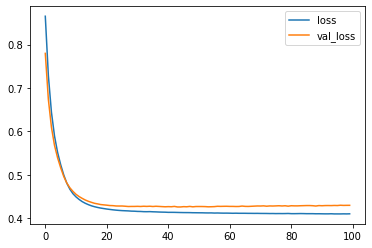

In [ ]:
metrics3[['loss','val_loss']].plot()

Comparing to functional API model, this loss graphic shows the overfitting part are smaller than the functional model.

<AxesSubplot:>

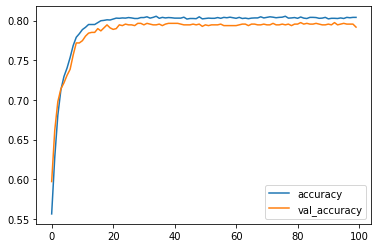

In [ ]:
metrics3[['accuracy','val_accuracy']].plot()

The accuracy from this model are not different from functional API model significantly. 

In [ ]:
y_pred3 = model3.predict(test_dataset)
y_pred3 = np.where(y_pred3>0.5,1,0)
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1279
           1       0.69      0.54      0.61       479

    accuracy                           0.81      1758
   macro avg       0.77      0.73      0.74      1758
weighted avg       0.80      0.81      0.80      1758



The accuracy from this model is the same with functional API model.

## Improvement 2

The second improvemen model I want to add the hidden layer and neuron.

In [ ]:
model4 = Sequential()
model4.add(Dense(10, activation = 'relu',input_shape=(26,)))
model4.add(Dense(9,activation='relu'))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(4,activation='relu'))
model4.add(Dense(1,activation = 'sigmoid'))

model4.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history4 = model4.fit(train_dataset, epochs = 100, validation_data=(val_dataset))

Epoch 1/100
66/66 [==============================] - 1s 4ms/step - loss: 0.6726 - accuracy: 0.5933 - val_loss: 0.6127 - val_accuracy: 0.7405
Epoch 2/100
66/66 [==============================] - 0s 3ms/step - loss: 0.5427 - accuracy: 0.7515 - val_loss: 0.4939 - val_accuracy: 0.7529
Epoch 3/100
66/66 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.7764 - val_loss: 0.4648 - val_accuracy: 0.7728
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.7835 - val_loss: 0.4544 - val_accuracy: 0.7652
Epoch 5/100
66/66 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7871 - val_loss: 0.4485 - val_accuracy: 0.7728
Epoch 6/100
66/66 [==============================] - 0s 3ms/step - loss: 0.4313 - accuracy: 0.7897 - val_loss: 0.4455 - val_accuracy: 0.7776
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.7946 - val_loss: 0.4426 - val_accuracy: 0.7842
Epoch 8/100
6

In [ ]:
metrics4 = pd.DataFrame(history4.history)
metrics4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.672560,0.593321,0.612697,0.740494
1,0.542735,0.751540,0.493853,0.752852
2,0.462350,0.776409,0.464830,0.772814
3,0.444199,0.783515,0.454381,0.765209
4,0.436465,0.787068,0.448492,0.772814


<AxesSubplot:>

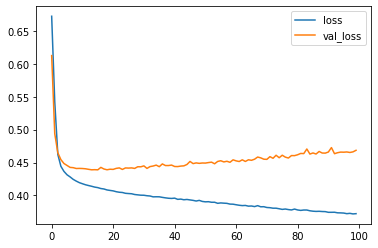

In [ ]:
metrics4[['loss','val_loss']].plot()

The result of this model are the most overfit model than other.

<AxesSubplot:>

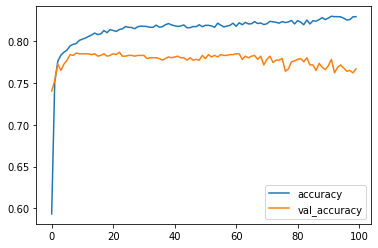

In [ ]:
metrics4[['accuracy','val_accuracy']].plot()

The accuracy is not good either, the overfit the worse performa among other models. More hidden layers mean the learning of the model are deep or usually mentioned as deep learning/ deep neural network. In fact, this model is too poowerful to predict this case that by only one layer (or single ANN) the model is already good enough to make predictions.

# Model Saving

First, I need to save pipeline preprocessing first. The best model I get is model3 where this is an improvement from the baseline model.

In [ ]:
with open('prep.pkl','wb') as f:
    pickle.dump(pipe_prep, f)

In [ ]:
model3.save('model.h5')

In [ ]:
#load model
modelsave = load_model('model.h5')
modelsave.predict(train_dataset)

array([[0.24341798],
       [0.41772985],
       [0.24546143],
       ...,
       [0.28168637],
       [0.1725063 ],
       [0.20239112]], dtype=float32)

# Model Inference

Let's try to predict a new data with the best model that I get.

In [ ]:
new = [1,0,1,3,12,1,1,'DSL',0,0,1,0,0,1,'Two year',1,'Bank transfer (automatic)',80.4,1234.5]

In [ ]:
new_data = pd.DataFrame([new],columns=X_train.columns)
new_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,3,12,1,1,DSL,0,0,1,0,0,1,Two year,1,Bank transfer (automatic),80.4,1234.5


In [ ]:
new_scale = pipe_prep.transform(new_data)
inf = model3.predict(new_scale)
inf = np.where(inf>0.5,1,0)
inf

array([[0]])

The prediction of the new data is 0 it means the customer will stay.

# Conclusion

Churn customer is an important factor that every company needs to do more research of how they can lose customer, how to make them stay, and how to gain their loyalty to the company. The model that I made, will help to predict if the customer will churn or stay. After analyze the dataset from Telco company, I have some insight:

1. Churn customers in Telco are minority if compare to the customer who stay.
2. Churn customer has low monthly Charges than the customer who stay.

The model that I use to predict the churn customer is Artificial Neural Network. Before building the model, I preprocessed the features and the target with standard scaler and one hot encoding that I put them in pipeline preprocessing. After that, I make pipeline tensorflow to be more efficient in memory usage.
For the model, I made sequential and functional model. In conclusion I made 4 models:
1. Sequential baseline model (1 hidden layer with 4 neuron)
2. Functional API model (1 hidden layer with 4 neuron)
3. Improvement Sequential model (1 hidden layer with 3 neuron)
4. Improvement Sequential model (4 hidden layer with 10,9,8,4 neuron)

the best model that I get is the third model, which is good fitting and has 0.81 accuracy.
The best model will be use to make the backend application along with the pipeline preprocessing.